### Student Information
Name:王玟婷

Student ID: 41021112L

GitHub ID: 

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

In [102]:
# categories
sentiment = ['nostalgia', 'not nostalgia']
sentiment

['nostalgia', 'not nostalgia']

In [103]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

X = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [104]:
X[0:9]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart


In [105]:
len(X)

1500

In [106]:
# add sentiment_number to the dataframe
sentiment_mapping = {'nostalgia': 0, 'not nostalgia': 1}
X['sentiment_number'] = X['sentiment'].map(sentiment_mapping)
X[0:9]

,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,1
1,nostalgia,The mist beautiful voice ever I listened to hi...,0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,0
5,nostalgia,"Every time I heard this song as a child, I use...",0
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",0
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,0
8,not nostalgia,Wherever you are you always in my heart,1


In [107]:
#a simple query
X[0:9][['sentiment','comment']]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart


In [108]:
#use loc to find the top 12th comment 
X.loc[:12,'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
11    this song came out my senior year in high scho...
12    A few years back picked up at a charity shop a...
Name: comment, dtype: object

In [109]:
#use iloc to find the top 12th comment
X.iloc[0:12]['comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
11    this song came out my senior year in high scho...
Name: comment, dtype: object

In [110]:
#use query to find the objects with nostalgia sentiment
X.query('"nostalgia" in sentiment')

,sentiment,comment,sentiment_number
1,nostalgia,The mist beautiful voice ever I listened to hi...,0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,0
5,nostalgia,"Every time I heard this song as a child, I use...",0
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",0
...,...,...,...
1488,nostalgia,Yup !!!! Bringing back an Enormous amount of ...,0
1491,nostalgia,real music...how i miss those days...brings ba...,0
1492,nostalgia,i used to cry over this song cause i had a boy...,0
1498,nostalgia,I was born in 1954 and started to be aware of ...,0


In [111]:
X.loc[lambda X: X['sentiment_number']==0][::10][:5]

,sentiment,comment,sentiment_number
1,nostalgia,The mist beautiful voice ever I listened to hi...,0
18,nostalgia,"My Grandparents had a pub in the 1970's, this ...",0
32,nostalgia,I remember my Mom listening to Jim over and ov...,0
50,nostalgia,"If I remember correctly, this song came out af...",0
71,nostalgia,Gosh does this bring back memories. Nearly eve...,0


## Checking null values

In [112]:
# check missing values
X.isnull()

,sentiment,comment,sentiment_number
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [113]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [114]:
X.isnull().apply(lambda x:dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [115]:
#create a dummy series
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "sentiment"])
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [116]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [117]:
X.dropna(inplace=True)

In [118]:
len(X)

1500

## Duplicate Data

In [119]:
len(X)

1500

In [120]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [121]:
sum(X.duplicated()) #duplicate data exists

1

In [122]:
sum(X.duplicated('comment'))

1

In [123]:
X.drop_duplicates(keep="first", inplace=True) #keep the first and discard the other

In [124]:
len(X)

1499

In [125]:
X[0:4]

,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,1
1,nostalgia,The mist beautiful voice ever I listened to hi...,0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1


## Sampling

In [126]:
X_sample = X.sample(n=500) #random state

In [127]:
len(X_sample)

500

In [128]:
X_sample[0:4]

,sentiment,comment,sentiment_number
926,nostalgia,"Takes me back to my childhood, lovely memories.",0
660,not nostalgia,I listen to this and think oh that was the gre...,1
383,nostalgia,"Such a beautiful song, my parents danced to th...",0
84,nostalgia,brilliant song always remind me wen i was in m...,0


In [132]:
#visualize the data and sample data
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

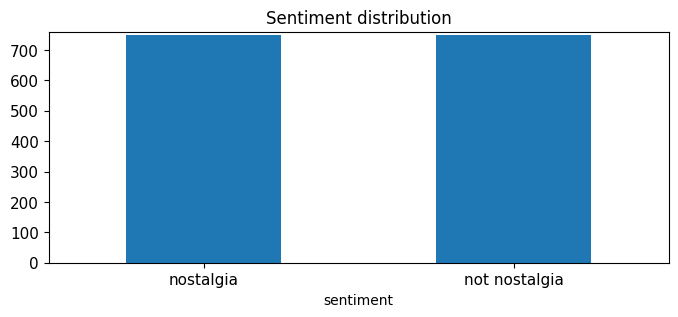

In [136]:
upper_bond= max(X.sentiment.value_counts() +10)
print(X.sentiment.value_counts())


# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bond],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
nostalgia        256
not nostalgia    244
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (sample)'}, xlabel='sentiment'>

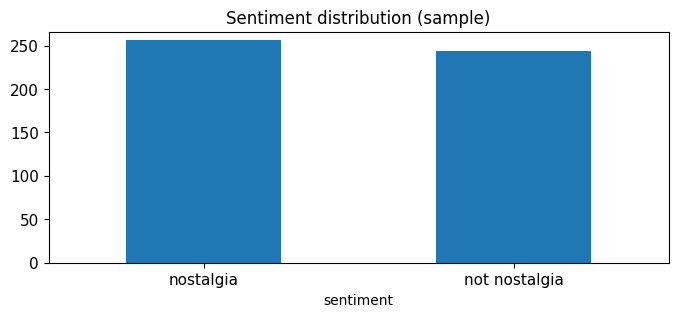

In [139]:
upper_bond_sample= max(X_sample.sentiment.value_counts() +10)
print(X_sample.sentiment.value_counts())


# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution (sample)',
                                    ylim = [0, upper_bond_sample],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

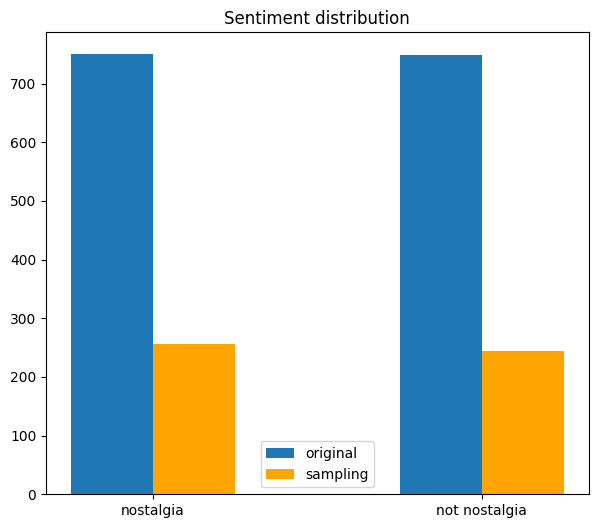

In [141]:
import numpy as np

original_counts = X.sentiment.value_counts()
sample_counts = X_sample.sentiment.value_counts()

plt.rcParams['figure.figsize']=(7,6)
labels =  original_counts.index

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_counts, width, label='original', )
rects2 = ax.bar(x + width/2, sample_counts, width, label='sampling',color = 'orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Sentiment distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Feature Creation

In [142]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\landy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [145]:
X[0:5]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [146]:
X[0:4]

,sentiment,comment,sentiment_number,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,1,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,0,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,0,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [147]:
list(X['unigrams'][0])

['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

## Feature subset selection

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [150]:
count_vect.get_feature_names_out()[3000]

'skipper'

In [151]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [153]:
X_counts.shape

(1499, 3730)

In [154]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [155]:
X_counts[0:5,0:100].toarray() #extract the first five docs and the first 100 words

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [156]:
array = X_counts[0:5, 0:100].toarray()

# Iterate over the rows and columns of the array using indices
for i in range(array.shape[0]):  
    for j in range(array.shape[1]):  
        if array[i][j] >0 : # Check the values
            print(f'array[{i}][{j}] = {array[i][j]}')

array[0][15] = 1
array[2][16] = 1
array[3][62] = 1
array[3][90] = 1
array[3][91] = 1


In [158]:
#find out the words that exist once
print(count_vect.get_feature_names_out()[15])
print(count_vect.get_feature_names_out()[16])
print(count_vect.get_feature_names_out()[62])
print(count_vect.get_feature_names_out()[90])
print(count_vect.get_feature_names_out()[91])

16years
17
1st
2nd
30


In [160]:
#use the first 20 data to create a heatmap
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

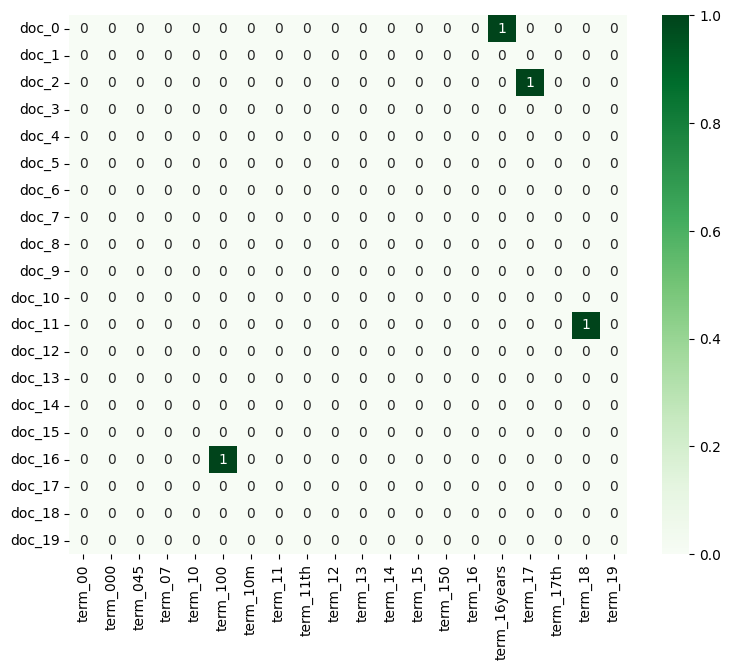

In [163]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="Greens",
                 vmin=0, vmax=1, annot=True)